<a href="https://colab.research.google.com/github/TeigenMillies/MAT422/blob/main/1_4_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4 Principal Component Analysis
---------------------------------------------------------
- Singular value decomposition
- Low-rank matrix approximations
-Principal component analysis

In [2]:
import matplotlib.pyplot as plt
import os
from google.colab import drive
import numpy as np
from sklearn import datasets
from IPython.display import display, Image

In [3]:
#Generate a random mxn matrix
m = 3
n = 4
A = np.random.randint(100, size=(m, n))

print(f"Random {m}x{n} Matrix A:")
print(A)

Random 3x4 Matrix A:
[[43 10  9 13]
 [88 83 79 15]
 [27 75 63 56]]


# 1.4.1 Singular Value Decomposition
Let A (also sometimes referenced as M) be an m×n matrix
with the dimension of col(A) = r. Then there exists an m × n matrix ∑, where
the diagonal entries in D are the first r singular values of A
σ1 ≥
σ2 ≥ · · · ≥
σr ≥ 0, and there exist an m × m orthogonal matrix U and an n × n orthogonal
matrix V such that

A = U ∑Vᵀ



In [5]:
#Singular Value Decomposition Visualization
svd_url = r"https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/1024px-Singular_value_decomposition_visualisation.svg.png"
display(Image(url=svd_url, width=300, unconfined=True))

Step 1: Find orthogonal matrix U

In [7]:
#Find eigenvalues and eigenvectors of AA^T
At = A.transpose()
L, U = np.linalg.eig(np.dot(A, At))
#U is the matrix of eigenvectors
print(f"Orthogonal Matrix U:\n{U}\n")

Orthogonal Matrix U:
[[-0.19848739 -0.89492556 -0.39963858]
 [-0.77993275  0.39115867 -0.48856913]
 [-0.5935551  -0.21471641  0.77562182]]



Step 2: Find diagonal matrix Σ

In [8]:
#D is the squareroot of eigenvalues
S = np.sqrt(L)
#Remove 0 elements
S = S[S != 0]
#Sort
S[::-1].sort()
print(f"Diagonal Matrix S:  \n{S}\n")

Diagonal Matrix S:  
[182.9655293   52.20268725  23.5689315 ]



Step 3: Find orthogonal matrix Vᵀ

In [9]:
#Compute the Eigenvectors of AtA
x, V = np.linalg.eig(np.dot(At, A))
Vt = V.transpose()
print(f"Orthogonal Matrix V^T:\n{Vt}\n")

Orthogonal Matrix V^T:
[[-0.50935839 -0.6079611  -0.55089637 -0.25971238]
 [-0.75162326  0.26098297  0.12778012  0.59213394]
 [ 0.41822766 -0.31453201 -0.39543885  0.75483995]
 [-0.02649771 -0.68069142  0.72374965  0.11019762]]



Compare results with np.linalg.svg

In [10]:
UA, SA, VA = np.linalg.svd(A)
print(f"Code results:\n")
print(f"Orthogonal Matrix U:\n{U}\n")
print(f"Diagonal Matrix S:  \n{S}\n")
print(f"Orthogonal Matrix V^T:\n{Vt}\n")
print(f"--------------------------------------------------------------\nnp.linalg.svg results:\n")
print(f"Orthogonal Matrix U:\n{UA}\n")
print(f"Diagonal Matrix S:  \n{SA}\n")
print(f"Orthogonal Matrix V^T:\n{VA}\n")

Code results:

Orthogonal Matrix U:
[[-0.19848739 -0.89492556 -0.39963858]
 [-0.77993275  0.39115867 -0.48856913]
 [-0.5935551  -0.21471641  0.77562182]]

Diagonal Matrix S:  
[182.9655293   52.20268725  23.5689315 ]

Orthogonal Matrix V^T:
[[-0.50935839 -0.6079611  -0.55089637 -0.25971238]
 [-0.75162326  0.26098297  0.12778012  0.59213394]
 [ 0.41822766 -0.31453201 -0.39543885  0.75483995]
 [-0.02649771 -0.68069142  0.72374965  0.11019762]]

--------------------------------------------------------------
np.linalg.svg results:

Orthogonal Matrix U:
[[ 0.19848739  0.39963858  0.89492556]
 [ 0.77993275  0.48856913 -0.39115867]
 [ 0.5935551  -0.77562182  0.21471641]]

Diagonal Matrix S:  
[182.9655293   52.20268725  23.5689315 ]

Orthogonal Matrix V^T:
[[ 0.50935839  0.6079611   0.55089637  0.25971238]
 [ 0.75162326 -0.26098297 -0.12778012 -0.59213394]
 [ 0.41822766 -0.31453201 -0.39543885  0.75483995]
 [-0.02649771 -0.68069142  0.72374965  0.11019762]]



# 1.4.2 Low-rank matrix approximations
low-rank matrix approximations using SVD can reduce the complexity of a matrix by keeping only the most significant features of the data. In practical applications, this can be useful for...
- Data compression
- Matrix completion
- Identifying dominant patterns in a dataset

Image Compression example

In [13]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving asu_football_game.jpeg to asu_football_game (1).jpeg


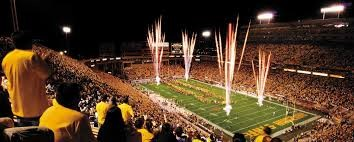

In [18]:
#Image to be compressed
game = Image('asu_football_game.jpeg')
game

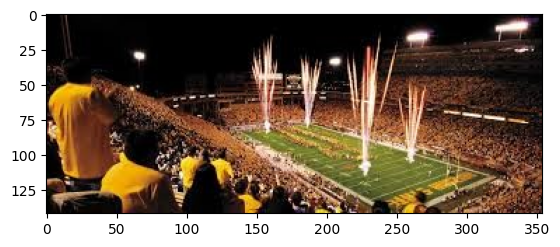

In [32]:
from PIL import Image
#Load image of asu football game
game = Image.open("/content/img/asu_football_game.jpeg")

plt.figure()
plt.imshow(game)
plt.show()

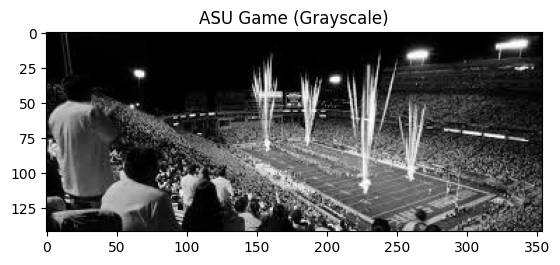

In [35]:
#Convert to Grayscale
game_grey = game.convert("LA")

#Make array of the R-band and resize
ga = np.array(list(game_grey.getdata(band=0)), float)
ga.shape = (game.size[1], game.size[0])

plt.figure()
plt.imshow(ga, cmap="gray")
plt.title("ASU Game (Grayscale)")
plt.show()
#Compute SVD
gu, gd, gv = np.linalg.svd(ga)

Compress Image

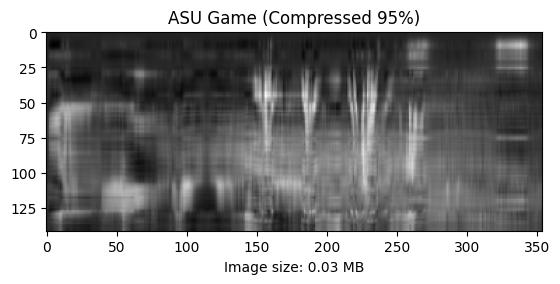

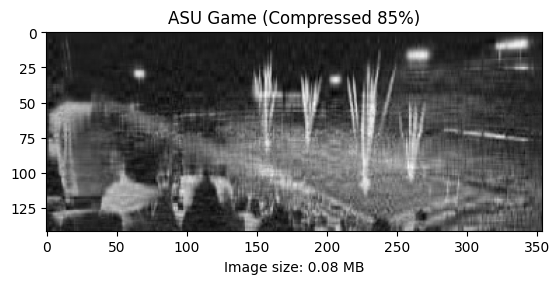

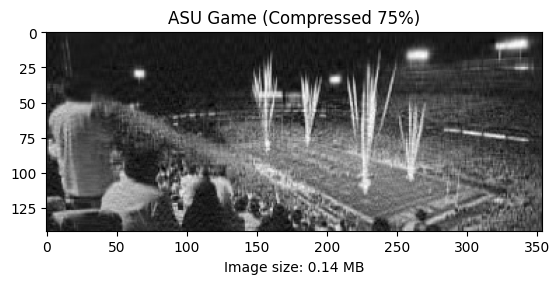

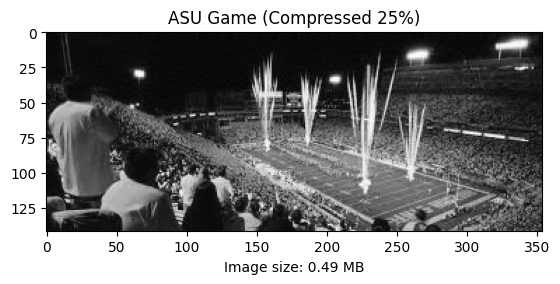

In [39]:
compressions = [5, 15, 25, 75]


for i, r in enumerate([min(game.size) * c // 100 for c in compressions]):
    #Compress image
    gur = np.matrix(gu[:,:r])
    gdr = np.diag(gd[:r])
    gvr = np.matrix(gv[:r,:])
    gac = gur * gdr * gvr

    #Display image
    plt.figure()
    plt.imshow(gac, cmap="gray")
    plt.title(f"ASU Game (Compressed {100-compressions[i]}%)")
    plt.xlabel(f"Image size: {(gur.nbytes + gdr.nbytes + gvr.nbytes)/2**20:.2f} MB", ha="center")
    plt.show()

# 1.4.3. Principal component analysis

PCA is a powerful tool for simplifying complex data. Its primary use is in reducing variability to it's essentials in order to preserve as much information as possible.


# Steps in principal component analysis
1. Standardize the data: This ensures that all variables contribute equally to the analysis.
2. Covariance matrix: This matrix captures the relationships between all pairs of variables in the data
3. Find eigenvectors and eigenvalues of convariance matrix: The eigenvectors represent the direction, or principal components, and the eigenvalues tell how much variance is captured
4. Project the data onto the new axes: The original data is transformedcreating a new dataset with fewer dimensions but preserving most of the variability in the data.

Principal Component Analysis Dataset Example

In [48]:
#Load Iris Dataset from scikit-learn
iris_data = datasets.load_iris(as_frame=True).data
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [49]:
#Standardize data
iris_mean = iris_data.mean()
iris_std = iris_data.std()

#Standardize each column
for col in iris_data.columns:
    iris_data[col] = iris_data[col].apply(lambda x: (x - iris_mean[col])/iris_std[col])

print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.897674          1.015602          -1.335752         -1.311052
1          -1.139200         -0.131539          -1.335752         -1.311052
2          -1.380727          0.327318          -1.392399         -1.311052
3          -1.501490          0.097889          -1.279104         -1.311052
4          -1.018437          1.245030          -1.335752         -1.311052


In [57]:
#Compute Covariance matrix
iris_covariance = iris_data.cov()

#Format and show covariance matrix
iris_covariance_figure = iris_covariance.style.format("{:.2f}")
display(iris_covariance_figure)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


In [58]:
#Find eigenvectors and eigenvalues of covariance matrix
covariance_eigenvalues, covariance_eigenvectors = np.linalg.eig(iris_cov)

#Display attributes with their eigenvalues
eigenvalues_dict = dict(zip(df.columns, covariance_eigenvalues))
print("Eigenvalues:")
for i, j in eigenvalues_dict.items():
    print(f"{i}: {j:2f}")

#Find top 2 Principal Components
iris_pc1, iris_pc2 = sorted(eigenvalues_dict)[:2]
print(f"\nPrincipal Components: {iris_pc1} and {iris_pc2}")

Eigenvalues:
sepal length (cm): 2.918498
sepal width (cm): 0.914030
petal length (cm): 0.146757
petal width (cm): 0.020715

Principal Components: petal length (cm) and petal width (cm)
